In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

Import csv files as dataframes

In [3]:
pdx_by_date = pd.read_csv('../data/By_Date/pdx_by_date.csv')
metro_by_date = pd.read_csv('../data/By_Date/metro_by_date.csv')
divvy_by_date = pd.read_csv('../data/By_Date/divvy_by_date.csv')
citi_by_date = pd.read_csv('../data/By_Date/citi_by_date.csv')
jc_citi_by_date = pd.read_csv('../data/By_Date/jc_citi_by_date.csv')
capital_by_date = pd.read_csv('../data/By_Date/capital_by_date.csv')
bay_by_date = pd.read_csv('../data/By_Date/bay_by_date.csv')
niceride_by_date = pd.read_csv('../data/By_Date/niceride_by_date.csv')
bluebike_by_date = pd.read_csv('../data/By_Date/bluebike_by_date.csv')

correct LA's "ride_date" column

In [4]:
metro_by_date.rename(columns={'start_date':'ride_date'}, inplace=True)

Plot total ride counts by city

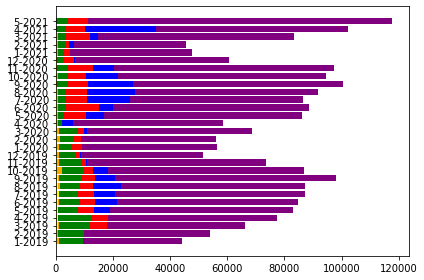

In [5]:
fig = figsize=(50,50)

plt.barh('m_y', 'ride_count', data=citi_by_date, color='purple')
plt.tight_layout()

plt.barh('m_y', 'ride_count', data=divvy_by_date, color='blue')
plt.tight_layout()

plt.barh('m_y', 'ride_count', data=capital_by_date, color='red')
plt.tight_layout()

plt.barh('m_y', 'ride_count', data=bay_by_date, color = 'green')
plt.tight_layout()

plt.barh('m_y', 'ride_count', data=metro_by_date, color='orange')
plt.tight_layout()

plt.barh('m_y', 'ride_count', data=pdx_by_date, color='yellow')
plt.tight_layout()


# legend.show()

Insert "City Column" in each DF

In [6]:
pdx_by_date['city'] = 'Portland'
metro_by_date['city'] = 'Los Angeles'
divvy_by_date['city'] = 'Chicago'
citi_by_date['city'] = 'New York City'
jc_citi_by_date['city'] = 'New York City'
capital_by_date['city'] = 'Washington DC'
bay_by_date['city'] = 'San Francisco'
bluebike_by_date['city'] = 'Boston'
niceride_by_date['city'] = 'Minneapolis'

Concatenate All DataFrames into what will be exported into Power BI

In [7]:
all_cities = pd.concat([pdx_by_date, bay_by_date, divvy_by_date, metro_by_date, citi_by_date, capital_by_date, jc_citi_by_date, bluebike_by_date, niceride_by_date])

Drop Unnecessary Columns

In [8]:
all_cities2 = all_cities

In [9]:
all_cities = all_cities.drop(['Unnamed: 0', 'month', 'year', 'm_y'], axis=1)

In [10]:
all_cities2 = all_cities2.drop(['Unnamed: 0', 'month', 'year'], axis=1)

Save as CSV

In [11]:
all_cities.to_csv('all_cities.csv')

In [12]:
all_cities2.groupby(['m_y', 'city']).agg({'ride_count':'sum'})

ride_count
m_y    city                     
1-2019 Boston              69548
       Chicago            102919
       Los Angeles         19208
       New York City      983137
       Portland             5942
...                          ...
9-2020 Los Angeles         11101
       Minneapolis         18533
       New York City     2506643
       San Francisco       75711
       Washington DC      215567

[206 rows x 1 columns]

In [13]:
all_cities.groupby(['city']).agg({'ride_count':'sum'})

,ride_count
city,
Boston,5298471
Chicago,8031733
Los Angeles,525844
Minneapolis,368319
New York City,48610857
Portland,168583
San Francisco,3679115
Washington DC,6053241


In [14]:
citi_by_date[(citi_by_date['year'] == 2019) & (citi_by_date['month'] == 1)].head()

,Unnamed: 0,ride_date,ride_count,month,year,m_y,city
0,0,2019-01-01,21778,1,2019,1-2019,New York City
1,1,2019-01-02,37670,1,2019,1-2019,New York City
2,2,2019-01-03,41544,1,2019,1-2019,New York City
3,3,2019-01-04,43776,1,2019,1-2019,New York City
4,4,2019-01-05,17356,1,2019,1-2019,New York City


In [15]:
ny = all_cities2[all_cities2['city'] == 'New York City']

In [16]:
ny.groupby('m_y').agg({'ride_count':'sum'})

,ride_count
m_y,
1-2019,983137
1-2020,1262891
1-2021,1098285
10-2019,2126413
10-2020,2274036
11-2019,1504574
11-2020,1743057
12-2019,971826
12-2020,1090831
